In [16]:
import json
import matplotlib.pyplot as plt

import bluepyopt as bpopt
import bluepyopt.ephys as ephys

import model
import evaluator
import time
import plotting

import sys

from pathlib import Path
import neuroplotlib as nplt

%matplotlib notebook

In [17]:
# !rm -r x86_64
# !nrnivmodl mechanisms
# mv mechanisms/x86_64 .

In [18]:
probe = model.define_electrode(probe_type="linear")

In [46]:
cell = model.create(morph_modifier="hillock", release=False, l_hillock=20)

param_names = [param.name for param in cell.params.values() if not param.frozen]

fitness_protocols = evaluator.define_protocols(
    feature_set=None, 
    feature_file=None, 
    electrode=probe,
    protocols_with_lfp=None
)

fitness_calculator = ephys.objectivescalculators.ObjectivesCalculator([])

sim = ephys.simulators.LFPySimulator(cell, cvode_active=True, electrode=probe)

eva = ephys.evaluators.CellEvaluator(                    
        cell_model=cell,                                                       
        param_names=param_names,                                                    
        fitness_protocols=fitness_protocols,                                        
        fitness_calculator=fitness_calculator,                                      
        sim=sim)

In [47]:
release_params = evaluator.get_release_params()

In [48]:
release_params

{'g_pas.somatic': 3.38e-05,
 'decay_CaDynamics_E2.somatic': 460.0,
 'gamma_CaDynamics_E2.somatic': 0.000501,
 'gCa_LVAstbar_Ca_LVAst.somatic': 0.00343,
 'gCa_HVAbar_Ca_HVA.somatic': 0.000992,
 'gSKv3_1bar_SKv3_1.somatic': 0.693,
 'gSK_E2bar_SK_E2.somatic': 0.0441,
 'gK_Tstbar_K_Tst.somatic': 0.0812,
 'gK_Pstbar_K_Pst.somatic': 0.00223,
 'gNap_Et2bar_Nap_Et2.somatic': 0.00172,
 'gNaTa_tbar_NaTa_t.somatic': 2.04,
 'decay_CaDynamics_E2.apical': 122.0,
 'gamma_CaDynamics_E2.apical': 0.000509,
 'gSK_E2bar_SK_E2.apical': 0.0012,
 'gSKv3_1bar_SKv3_1.apical': 0.000261,
 'gNaTa_tbar_NaTa_t.apical': 0.0213,
 'gImbar_Im.apical': 6.75e-05,
 'g_pas.apical': 5.89e-05,
 'gCa_LVAstbar_Ca_LVAst.apical': 0.0187,
 'gCa_HVAbar_Ca_HVA.apical': 0.000555,
 'g_pas.basal': 4.67e-05,
 'g_pas.axonal': 3.25e-05,
 'g_pas.axon_initial_segment': 3.25e-05,
 'gNa12bar_Na12Hu2009.axon_initial_segment': 0.00163205413,
 'gNa16bar_Na16Hu2009.axon_initial_segment': 0.0125055737484,
 'gK_Tstbar_K_Tst.axon_initial_segment': 

In [49]:
for param in release_params.keys():
    if "axon_initial_segment" in param:
        if "Na12bar" in param:
            release_params[param] = 3.147 #release_params[param]*100
        if "Na16bar" in param:
            release_params[param] = 2 #release_params[param]*100
        if "kbar" in param:
            release_params[param] = 0.1
        if "g_pas" in param:
            release_params[param] = 4.7e-5
        if "e_pas" in param:
            release_params[param] = -79.6
        if "e_k" in param:
            release_params[param] = -85

In [50]:
release_params

{'g_pas.somatic': 3.38e-05,
 'decay_CaDynamics_E2.somatic': 460.0,
 'gamma_CaDynamics_E2.somatic': 0.000501,
 'gCa_LVAstbar_Ca_LVAst.somatic': 0.00343,
 'gCa_HVAbar_Ca_HVA.somatic': 0.000992,
 'gSKv3_1bar_SKv3_1.somatic': 0.693,
 'gSK_E2bar_SK_E2.somatic': 0.0441,
 'gK_Tstbar_K_Tst.somatic': 0.0812,
 'gK_Pstbar_K_Pst.somatic': 0.00223,
 'gNap_Et2bar_Nap_Et2.somatic': 0.00172,
 'gNaTa_tbar_NaTa_t.somatic': 2.04,
 'decay_CaDynamics_E2.apical': 122.0,
 'gamma_CaDynamics_E2.apical': 0.000509,
 'gSK_E2bar_SK_E2.apical': 0.0012,
 'gSKv3_1bar_SKv3_1.apical': 0.000261,
 'gNaTa_tbar_NaTa_t.apical': 0.0213,
 'gImbar_Im.apical': 6.75e-05,
 'g_pas.apical': 5.89e-05,
 'gCa_LVAstbar_Ca_LVAst.apical': 0.0187,
 'gCa_HVAbar_Ca_HVA.apical': 0.000555,
 'g_pas.basal': 4.67e-05,
 'g_pas.axonal': 3.25e-05,
 'g_pas.axon_initial_segment': 3.25e-05,
 'gNa12bar_Na12Hu2009.axon_initial_segment': 3.1,
 'gNa16bar_Na16Hu2009.axon_initial_segment': 2,
 'gK_Tstbar_K_Tst.axon_initial_segment': 0.00820191119,
 'gSKv3_1

In [51]:
t_start = time.time()
responses = eva.run_protocols(protocols=fitness_protocols.values(), param_values=release_params)
print(f"Elapsed time: {time.time() - t_start}")

/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)
/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)
/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)
/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Elapsed time: 9.575747013092041


In [30]:
responses

{'bAP.soma.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fee72e93630>,
 'bAP.dend1.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fee72ea7080>,
 'bAP.dend2.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fee72ea71d0>,
 'bAP.MEA.LFP': <bluepyopt.ephys.responses.TimeLFPResponse at 0x7fee72ea7320>,
 'BAC.soma.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fee72e93438>,
 'BAC.dend1.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fee72e93f60>,
 'BAC.dend2.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fee72ea7780>,
 'BAC.MEA.LFP': <bluepyopt.ephys.responses.TimeLFPResponse at 0x7fee72ea78d0>,
 'EPSP.soma.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fee72e93ef0>,
 'EPSP.dend1.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fee72e93f98>,
 'EPSP.dend2.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fee72ea7d30>,
 'EPSP.MEA.LFP': <bluepyopt.ephys.responses.TimeLFPResponse at 0x7fee72ea7e80>,
 'CaBurst.soma.

In [ ]:
# cell.freeze({})
# cell.instantiate(sim=sim)
# for sec in cell.LFPyCell.allseclist:
#     print(sec.name())
# cell.destroy()

<IPython.core.display.Javascript object>


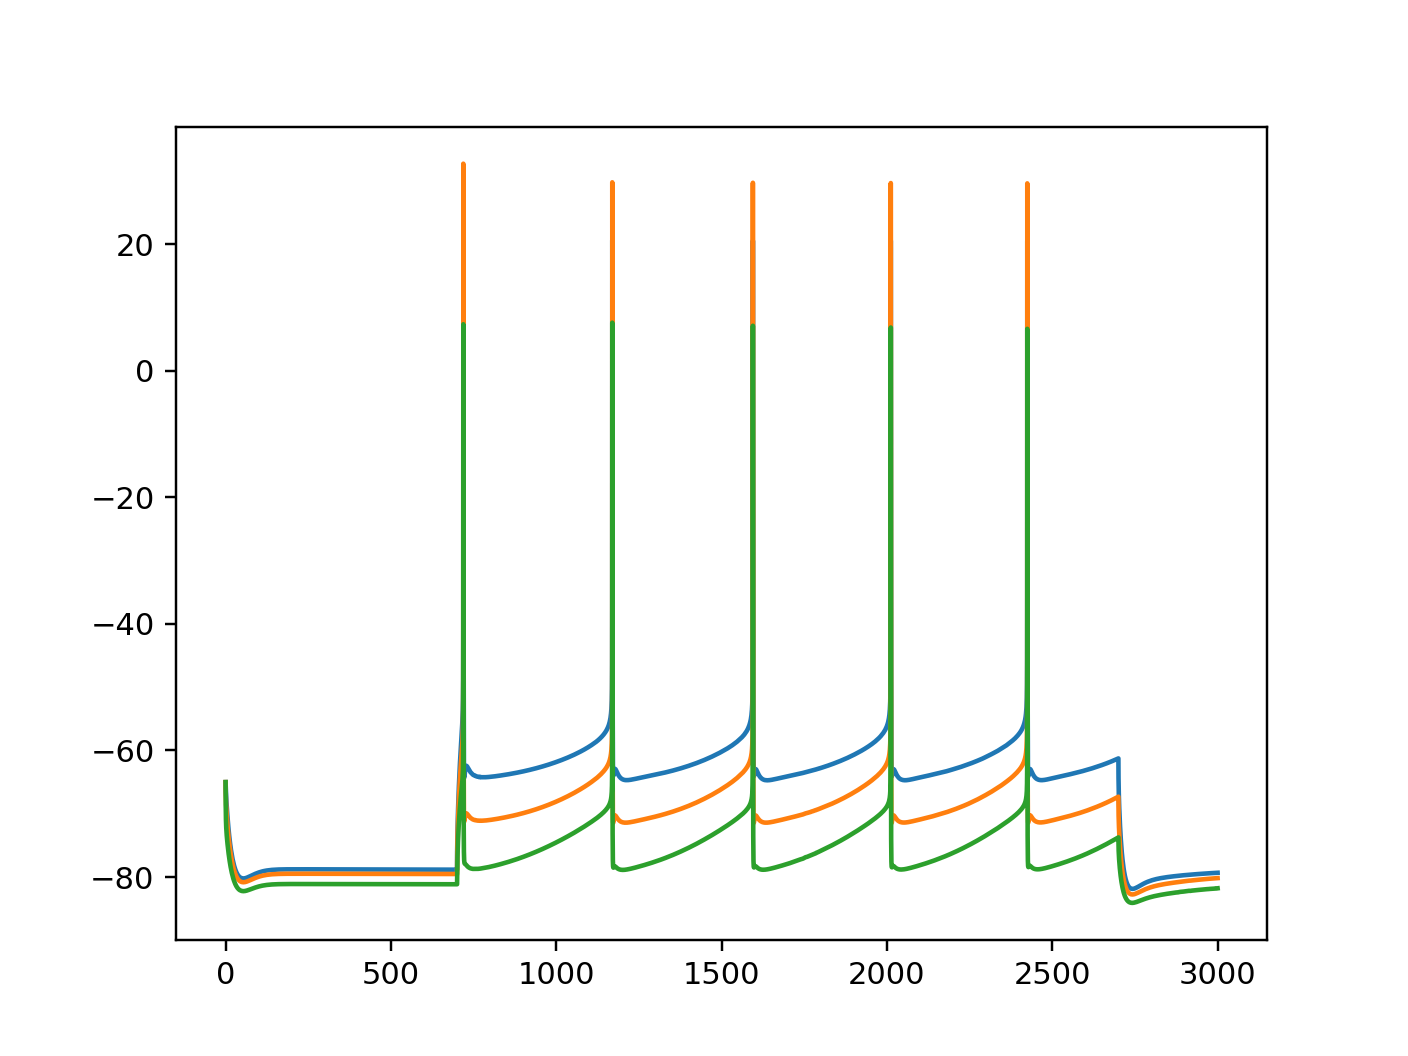

In [53]:
plt.figure()
plt.plot(responses["Step1.soma.v"]["time"], responses["Step1.soma.v"]["voltage"])
plt.plot(responses["Step1.ais0.v"]["time"], responses["Step1.ais0.v"]["voltage"])
plt.plot(responses["Step1.ais1.v"]["time"], responses["Step1.ais1.v"]["voltage"])

<IPython.core.display.Javascript object>


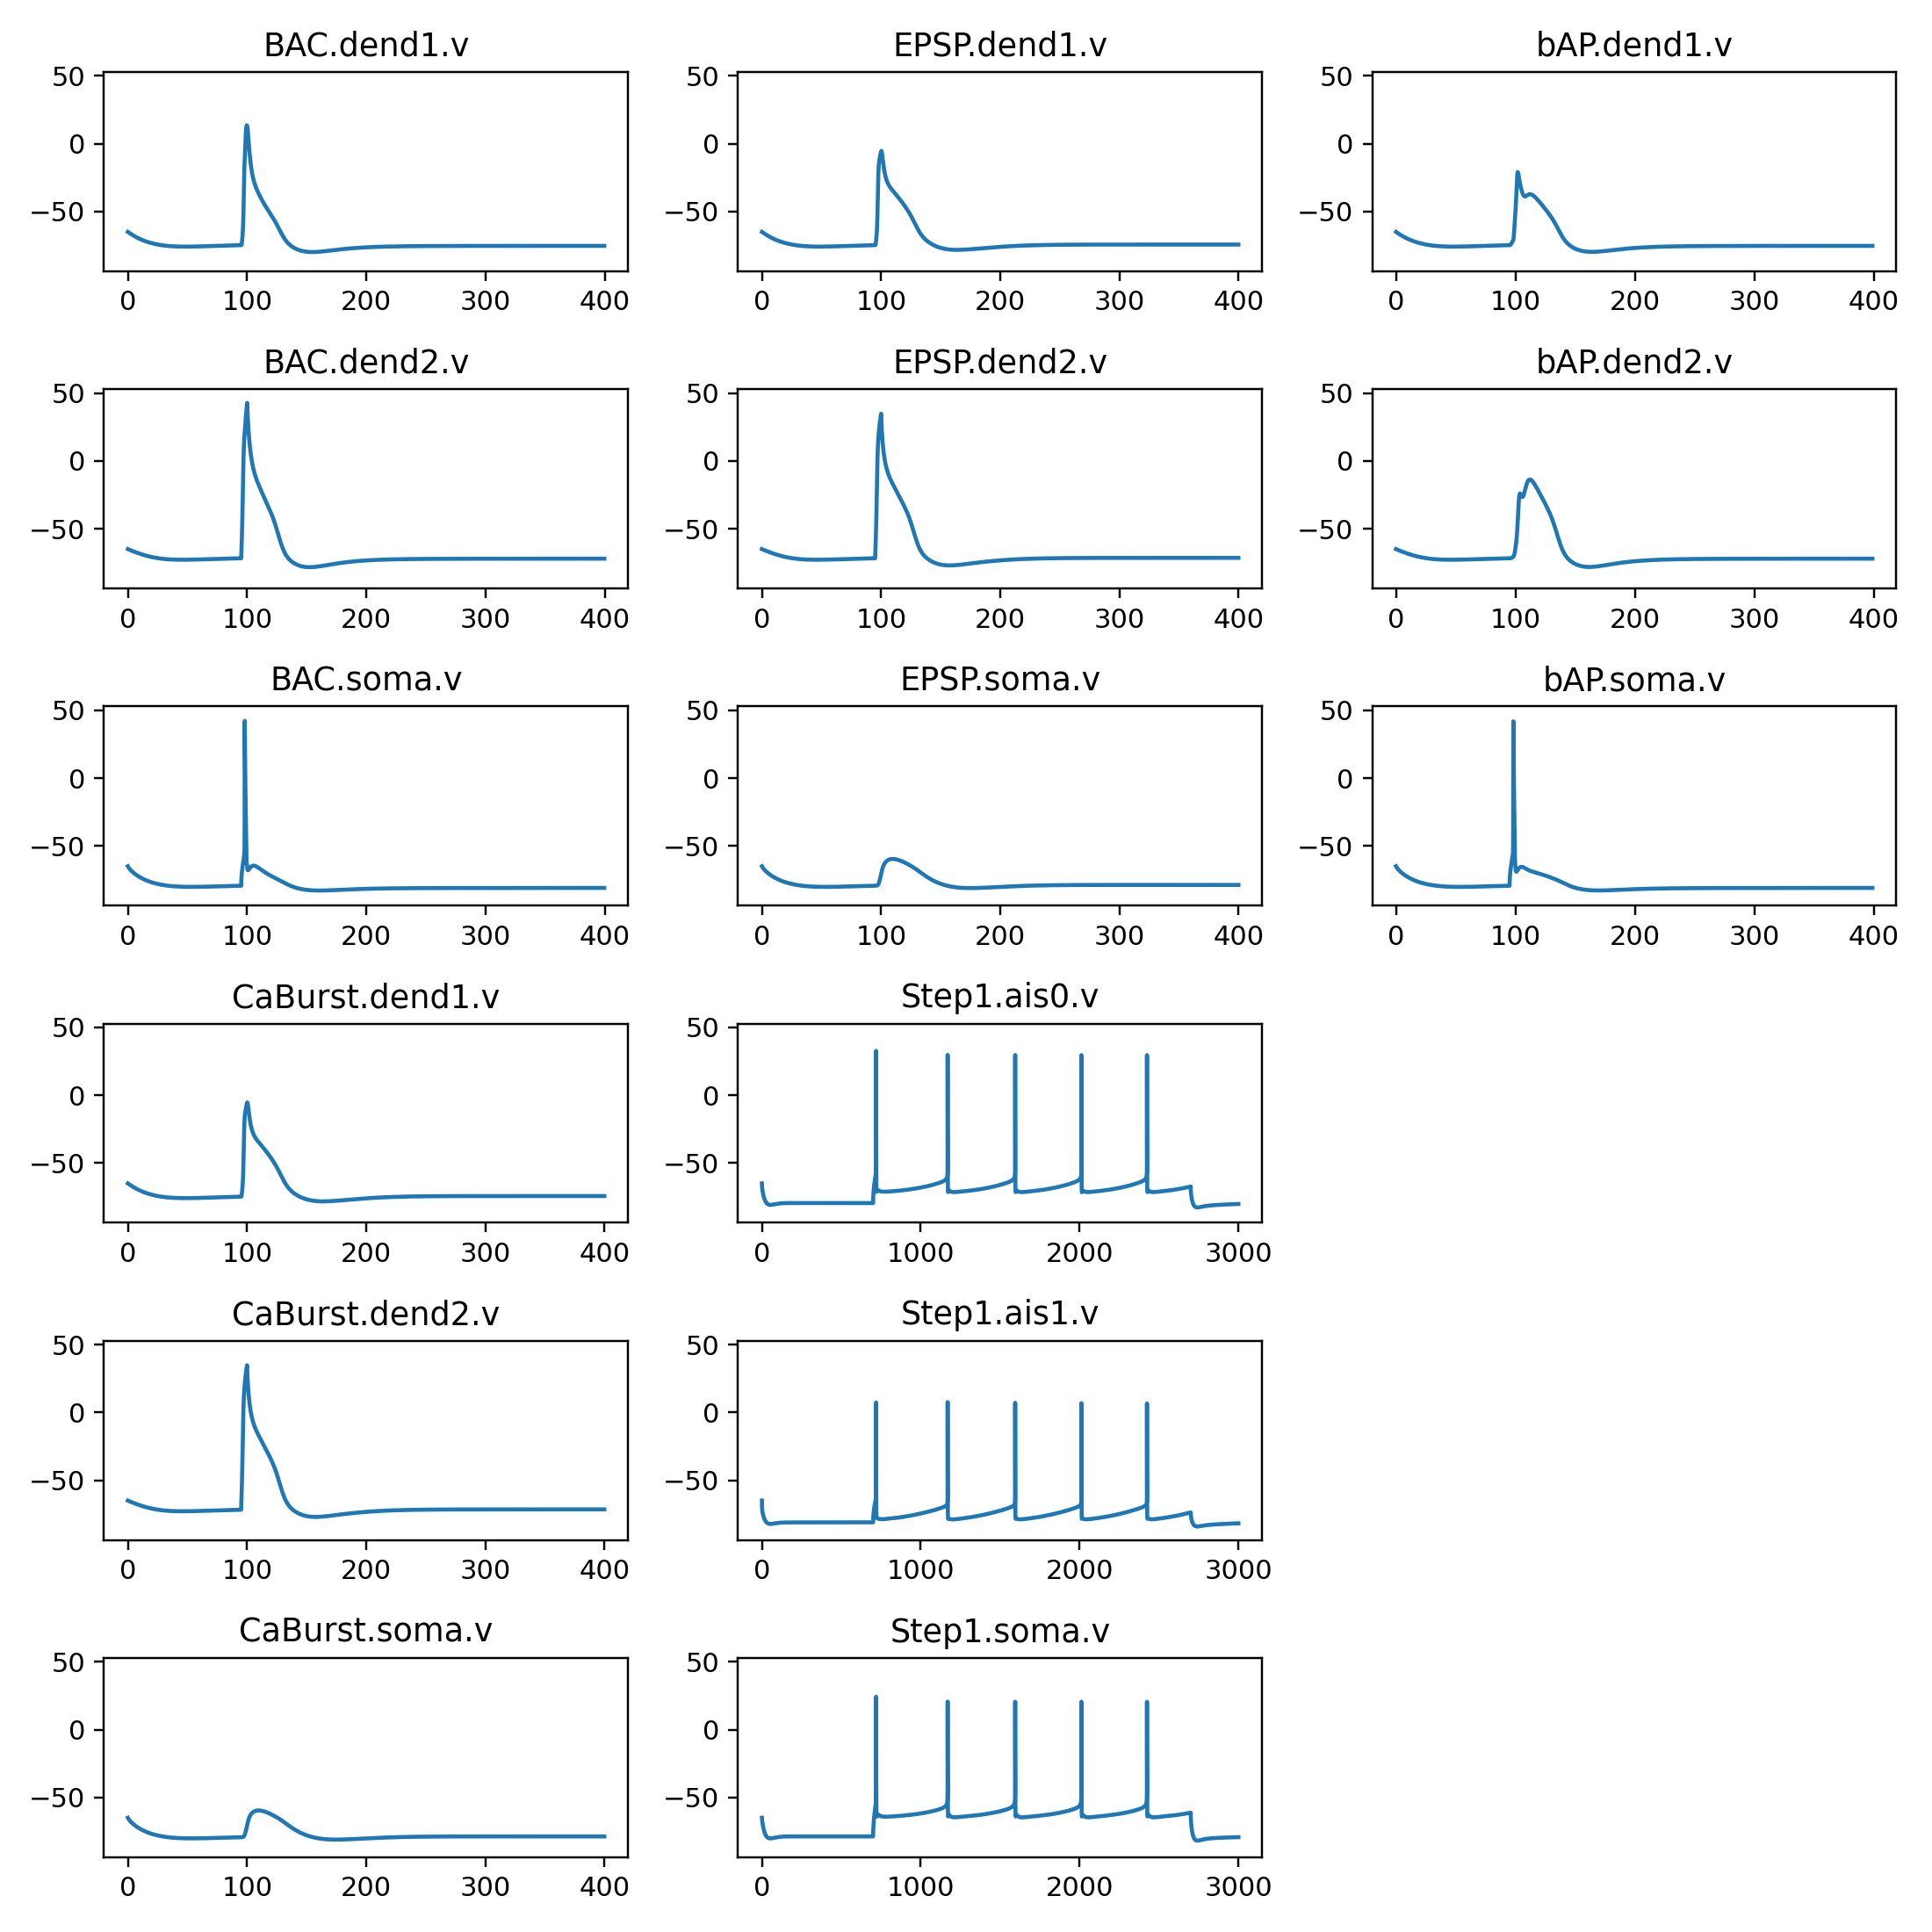

In [52]:
plotting.plot_responses(responses)

In [ ]:
plotting.plot_eap(responses, fitness_protocols, protocol_name="Step1", probe=probe.probe, norm=False)

In [ ]:
cell.freeze(release_params)
cell.instantiate(sim=sim)
nplt.plot_detailed_neuron(cell.LFPyCell, color_ais="r", color_hillock="k", color_myelin="g")
cell.destroy(sim=sim)
cell.unfreeze(release_params.keys())

In [ ]:
cell.icell.axonal

In [ ]:
for seg in sec.allseg():
    print(seg)

In [ ]:
cell.destroy(sim=sim)
cell.unfreeze(release_params.keys())

In [ ]:
cell.axonal

In [ ]:
nplt.plot_detailed_neuron(morphology="morphology/cell1.asc", color_axon="r")